In [1]:
#Necessary imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
#np.random.seed(42)

In [2]:
#Function to generate initial weights based on the condition
def get_intial_weights():
    while(1):
        x = np.random.rand()
        y = np.random.rand()
        if x + y < 1:
            return np.array([x,y])

In [3]:
#Function to calculate the gradient
def calc_gradient(W):
    df_dx = (2 * W[0] + W[1] - 1)/ (W[0] * (1 - W[0] - W[1]))
    df_dy = (W[0] + 2 * W[1] - 1)/ (W[1] * (1 - W[0] - W[1]))
    return np.array([df_dx,df_dy])

In [4]:
#Function to calculate Hessian
def calc_hessian(W):
    d2f_dx2 = ((1 / (1 - W[0] - W[1]) ** 2) + (1 / (W[0] ** 2)))
    d2f_dxdy_dydx = 1 / ((1 - W[0] - W[1]) ** 2)
    d2f_dy2 = ((1 / (1 - W[0] - W[1]) ** 2) + (1 / (W[1] ** 2)))
    return np.array([[d2f_dx2,d2f_dxdy_dydx],[d2f_dxdy_dydx,d2f_dy2]])

In [5]:
#Function to update weights in Gradient and Hessian methods
def update_weights(W,eta,method):
    if method == 'gradient':
        W = W - (eta * calc_gradient(W))
    else:
        W = W - (eta * np.matmul(np.linalg.inv(calc_hessian(W)),calc_gradient(W)))
    return W

In [6]:
#Function to calculate error(energy) of the function
def calc_error(W):
    E = -np.log(1 - W[0] - W[1]) - np.log(W[0]) - np.log(W[1])
    return E

In [7]:
#Print Statements
def print_statements(epoch,error,W,updated_error,error_rate):
    print('epoch:',epoch)
    print('Error before weight update: {}'.format(error))
    print('Updated Weights are : {}'.format(W))
    print('Error after weight update: {}'.format(updated_error))
    print('Change in Error: {}'.format(error_rate))
    print('-' * 50)
    return

In [8]:
#Function to implement Gradient Descent and Newton's Method
def gradient_descent_newton(W,eta,threshold,method):
    errors = []
    weights = []
    epochs = [1]
    error_rate = 1
    epoch = 1
    error = calc_error(W)
    errors.append(error)
    weights.append(W)
    while error_rate >= threshold and epoch < 500:
        epoch+=1
        epochs.append(epoch)
        error = calc_error(W)
        if method == 'gradient':
            W = update_weights(W,eta,method)
        else:
            W = update_weights(W,eta,method)
        weights.append(W)
        updated_error = calc_error(W)
        errors.append(updated_error)
        error_rate = abs(updated_error-error)
        if method == 'newton':
            if epoch % 50 == 0:
                print_statements(epoch,error,W,updated_error,error_rate)
        else:
            if epoch % 20 == 0:
                print_statements(epoch,error,W,updated_error,error_rate)
    return epochs,errors,weights

In [9]:
#Function to plot the error(energy) vs the number of epochs
def energy_plot(epochs,errors,method):
    fig,ax = plt.subplots(figsize=(10,10))
    if method == 'gradient':
        _ = plt.scatter(epochs,errors,label = 'Energy Plot - Gradient Descent')
        plt.title('Energy Plot - Gradient Descent')
    else:
        _ = plt.scatter(epochs,errors,label = 'Energy Plot - Newton\'s Method')
        plt.title('Energy Plot - Newton\'s Method')
    plt.xlabel('Epochs')
    plt.ylabel('Energy values')
    ax.legend()
    plt.show()
    return 

In [10]:
#Function to plot the weights
def weight_plot(weights,method):
    fig,ax = plt.subplots(figsize=(10,10))
    if method == 'gradient':
        _ = plt.scatter([weight[0] for weight in weights],[weight[1] for weight in weights],label = 'Gradient Descent',color='red')
        plt.title('Gradient Descent - Trajectory')
    else:
        _ = plt.scatter([weight[0] for weight in weights],[weight[1] for weight in weights],label = 'Newton\'s Method',color='red')
        plt.title('Newton\'s Method - Trajectory')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('x')
    plt.ylabel('y')
    ax.legend()
    plt.show()
    return 


Initial Weights: [0.10984578 0.58021449]
Learning Rate: 0.01


epoch: 20
Error before weight update: 3.3099227421827493
Updated Weights are : [0.30043731 0.37213446]
Error after weight update: 3.3075025979132175
Change in Error: 0.0024201442695317432
--------------------------------------------------
epoch: 40
Error before weight update: 3.2961607714291903
Updated Weights are : [0.32795533 0.33887204]
Error after weight update: 3.29610508955479
Change in Error: 5.568187440019301e-05
--------------------------------------------------


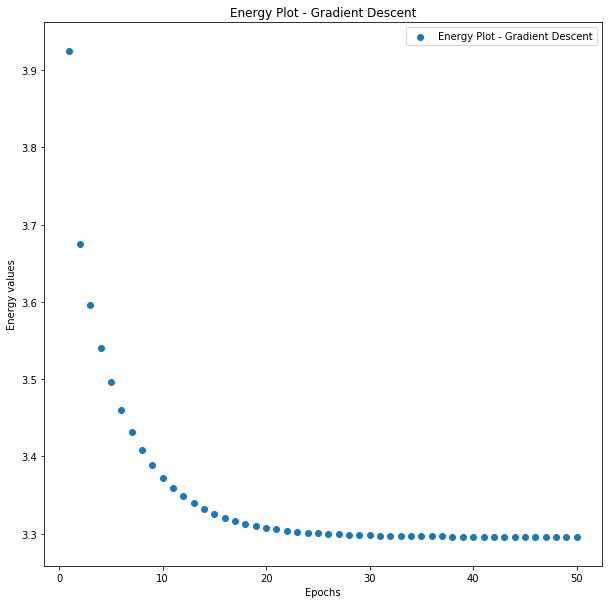

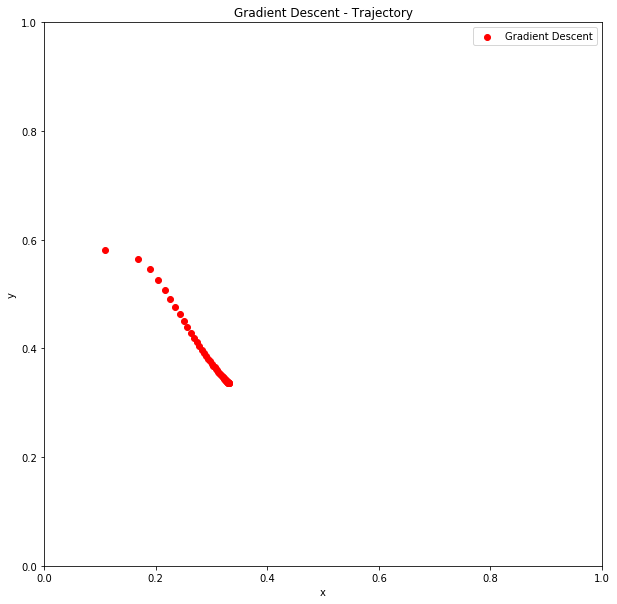


Number of epochs: 50
Final Weights: [0.3312199  0.33547149]
Time taken to run the Gradient Descent Algorithm: 0.0015811920166015625
The final error rate: 3.2958775389882766


In [11]:
eta = 0.01
threshold = 0.00001
W = get_intial_weights()
print('\nInitial Weights: {}'.format(W))
print('Learning Rate: {}\n\n'.format(eta))
gradient_start = time.time()
epochs,errors,weights = gradient_descent_newton(W,eta,threshold,'gradient')
gradient_end = time.time()
energy_plot(epochs,errors,'gradient')
weight_plot(weights,'gradient')
print('\nNumber of epochs: {}'.format(max(epochs)))
print('Final Weights: {}'.format(weights[-1]))
print('Time taken to run the Gradient Descent Algorithm: {}'.format(gradient_end-gradient_start))
print('The final error rate: {}'.format(errors[-1]))


Initial Weights: [0.10984578 0.58021449]
Learning Rate: 0.01


epoch: 50
Error before weight update: 3.633946944068488
Updated Weights are : [0.15353849 0.50259117]
Error after weight update: 3.629272812665401
Change in Error: 0.004674131403087145
--------------------------------------------------
epoch: 100
Error before weight update: 3.456229462260686
Updated Weights are : [0.20016984 0.44377617]
Error after weight update: 3.453696935925365
Change in Error: 0.0025325263353210836
--------------------------------------------------
epoch: 150
Error before weight update: 3.365247051580348
Updated Weights are : [0.24149259 0.40328844]
Error after weight update: 3.364040600083023
Change in Error: 0.0012064514973251228
--------------------------------------------------
epoch: 200
Error before weight update: 3.32390606378455
Updated Weights are : [0.27322255 0.37676297]
Error after weight update: 3.323388384338472
Change in Error: 0.0005176794460779455
--------------------------------------

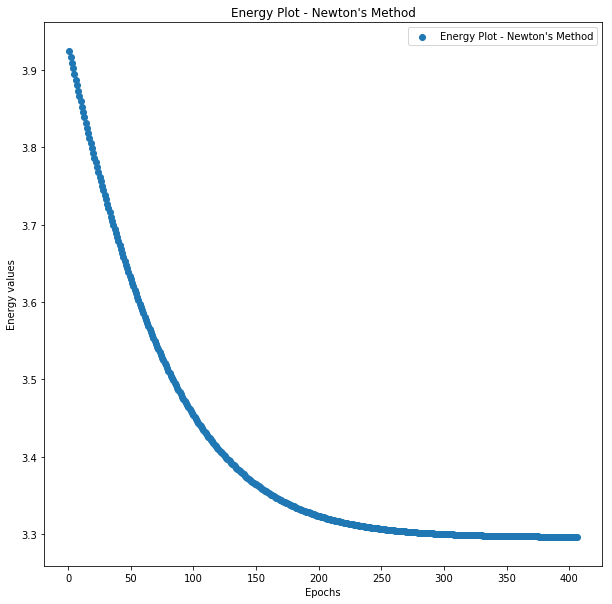

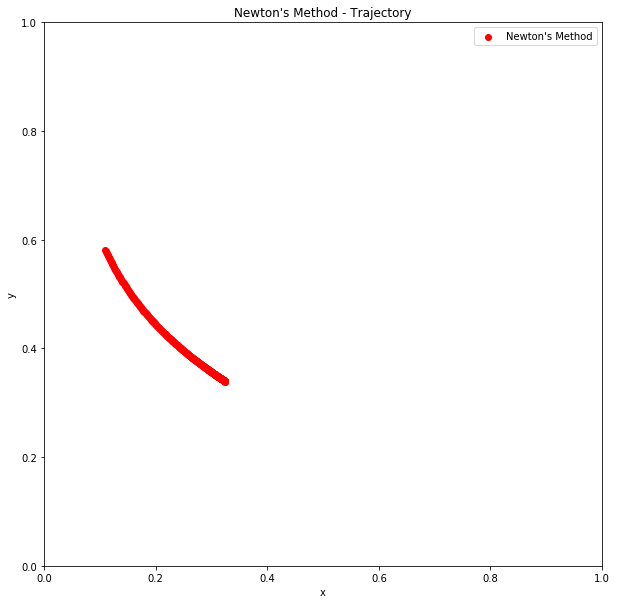

Number of epochs: 406
Final Weights: [0.32497851 0.3389658 ]
Time taken to run the Newton's Algorithm: 0.03572797775268555
The final error rate: 3.2958775389882766


In [12]:
print('\nInitial Weights: {}'.format(W))
print('Learning Rate: {}\n\n'.format(eta))
gradient_descent_newton_start = time.time()
epochs_newton,errors_newton,weights_newton = gradient_descent_newton(W,eta,threshold,'newton')
gradient_descent_newton_end = time.time()
energy_plot(epochs_newton,errors_newton,'newton')
weight_plot(weights_newton,'newton')
print('Number of epochs: {}'.format(max(epochs_newton)))
print('Final Weights: {}'.format(weights_newton[-1]))
print('Time taken to run the Newton\'s Algorithm: {}'.format(gradient_descent_newton_end-gradient_descent_newton_start))
print('The final error rate: {}'.format(errors[-1]))

2(d) With a learning rate of 0.01 and a threshold of 0.00001 for error rate (Difference between the energy values), we can see that the Gradient Descent method converges to global minima in less number of iterations than the Newtons method. The Gradient Descent Algorithm converged at 50 epochs where as the Newtons method took 406 epochs to converge. Both were started with the same set of initial weights that were generated randomly provided the conditions. We can also see that the time taken by the Gradient Descent is comparatively lesser than the Newton Method. The learning rate,thresold set and the initial weights will impact the number of epochs and the time it takes to converge.